# Data exploration and quality check

Here is some steps I took to assess the datasets (input/output) of this challenge.

In [17]:
import pandas as pd
import seaborn as sns

## Inputs datasets 

In [2]:
# Load input data  and check what the dataset looks like

inputs = pd.read_csv('input.csv')
inputs

,id,gender,age,experience,comp_speed,audr_500,audr_1k,audr_2k,audr_3k,audr_4k,audr_6k,audr_8k
0,13386.0,2,30,1,0,10,5,0,0,5,10,15
1,20063.0,1,20,0,1,10,5,10,-10,10,10,10
2,6240.0,2,53,0,1,15,10,15,10,10,25,30
3,12160.0,1,39,0,1,10,10,15,15,15,10,5
4,11459.0,2,60,0,1,5,0,10,35,45,65,75
...,...,...,...,...,...,...,...,...,...,...,...,...
2994,88217.0,1,51,1,1,15,5,5,10,25,20,30
2995,1520.0,2,46,1,0,15,10,10,30,20,35,15
2996,35353.0,1,73,1,1,10,10,15,45,45,50,45
2997,66261.0,2,52,0,1,5,10,10,15,20,40,50


In [7]:
# Quality check: does the minimum/maximum values make sense.
inputs.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2999.0,46554.212404,32832.090727,10.0,15359.0,40293.0,71721.0,102950.0
gender,2999.0,1.485162,0.499863,1.0,1.0,1.0,2.0,2.0
age,2999.0,51.847282,18.572219,7.0,38.0,54.0,66.0,85.0
experience,2999.0,0.392798,0.488454,0.0,0.0,0.0,1.0,1.0
comp_speed,2999.0,0.608203,0.488233,0.0,0.0,1.0,1.0,1.0
audr_500,2999.0,16.827276,13.191343,-10.0,10.0,15.0,20.0,95.0
audr_1k,2999.0,16.323775,14.149146,-10.0,5.0,15.0,20.0,95.0
audr_2k,2999.0,20.523508,16.680173,-10.0,10.0,15.0,30.0,105.0
audr_3k,2999.0,26.610537,19.591995,-10.0,15.0,20.0,37.5,115.0
audr_4k,2999.0,31.530510,21.461564,-10.0,15.0,25.0,45.0,120.0


In [6]:
# Quality check: Check that there is no missing data
inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          2999 non-null   float64
 1   gender      2999 non-null   int64  
 2   age         2999 non-null   int64  
 3   experience  2999 non-null   int64  
 4   comp_speed  2999 non-null   int64  
 5   audr_500    2999 non-null   int64  
 6   audr_1k     2999 non-null   int64  
 7   audr_2k     2999 non-null   int64  
 8   audr_3k     2999 non-null   int64  
 9   audr_4k     2999 non-null   int64  
 10  audr_6k     2999 non-null   int64  
 11  audr_8k     2999 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 281.3 KB


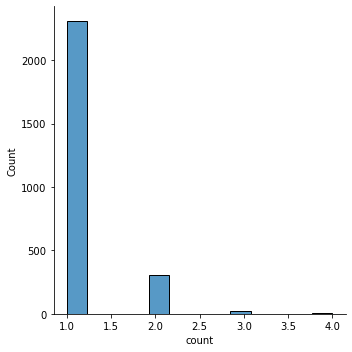

In [29]:
# Check if we have the same patient multiple time (could be different assesment or maybe different tests for each year ear?) 
multiple_participants = inputs.groupby('id').count()[['gender']].rename(columns={'gender':'count'})
sns.displot(multiple_participants, x="count")

In [27]:
# Check an example of patient with 2 tests 
# Seems like this id=188 tried an audio aids (row=2814) but hearing decreased (row=1282) and had to change the earing aids settings
inputs.loc[inputs['id']==188.0]

,id,gender,age,experience,comp_speed,audr_500,audr_1k,audr_2k,audr_3k,audr_4k,audr_6k,audr_8k
1282,188.0,2,38,1,0,0,5,0,15,15,25,15
2814,188.0,2,38,0,0,0,5,5,5,10,25,15


## Output dataset 

In [30]:
outputs = pd.read_csv('output.csv')
outputs

,500_r,1k_r,2k_r,3k_r,4k_r,6k_r,8k_r
0,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0220
1,2.0000,2.0000,2.0000,2.2282,3.2256,3.2546,3.2453
2,2.0000,2.0000,3.0293,3.7704,5.7486,6.0464,6.3787
3,2.0000,2.0000,2.9498,3.1905,4.7745,4.1016,3.3007
4,2.0000,3.0819,2.8872,5.8935,14.3690,14.7900,15.2080
...,...,...,...,...,...,...,...
29994,4.2469,14.8230,16.5700,18.7130,24.9090,25.1610,25.4540
29995,4.5148,8.8274,4.0643,5.7366,11.1690,11.1900,11.2010
29996,3.5314,5.6341,2.0000,2.0000,2.4568,2.2284,2.1047
29997,2.0000,2.0000,19.2740,18.1890,17.3650,17.8790,18.5360


In [32]:
# Check the min/max value
outputs.describe().T

,count,mean,std,min,25%,50%,75%,max
500_r,29999.0,2.891279,2.015593,2.0,2.00000,2.0000,2.98515,24.962
1k_r,29999.0,6.222365,5.508333,2.0,2.00000,4.2610,8.46900,52.468
2k_r,29999.0,7.761668,7.442697,2.0,2.00000,4.8559,10.22100,55.432
3k_r,29999.0,8.753583,7.240810,2.0,3.28460,6.3739,11.62950,52.112
4k_r,29999.0,12.384829,8.453265,2.0,5.59350,10.4890,17.68950,57.082
6k_r,29999.0,12.540611,8.599388,2.0,5.59885,10.6350,17.99350,55.878
8k_r,29999.0,12.645782,8.663834,2.0,5.54910,10.8160,18.29450,53.185


In [33]:
# Check for missing data
outputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   500_r   29999 non-null  float64
 1   1k_r    29999 non-null  float64
 2   2k_r    29999 non-null  float64
 3   3k_r    29999 non-null  float64
 4   4k_r    29999 non-null  float64
 5   6k_r    29999 non-null  float64
 6   8k_r    29999 non-null  float64
dtypes: float64(7)
memory usage: 1.6 MB
